In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [144]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [145]:
df['Current date'] = pd.to_datetime(df['Current date'])
df['Next date'] = pd.to_datetime(df['Next date'])

In [146]:
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [147]:
#df.set_index('Current date', inplace=True)

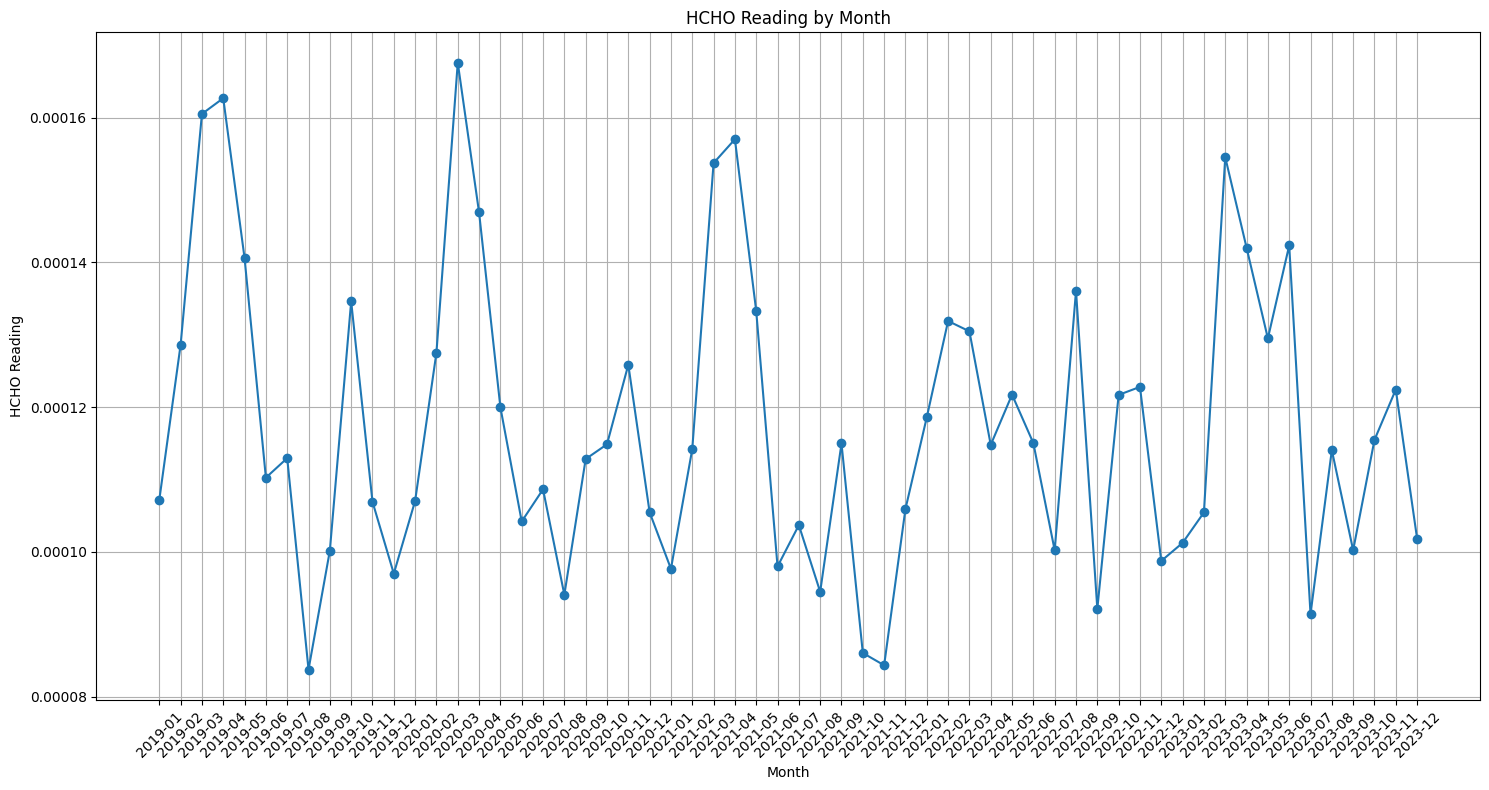

In [148]:
# Convert 'Current date' to datetime format
df['Current date'] = pd.to_datetime(df['Current date'])

# Group data by month and calculate the mean HCHO reading for each month
df_monthly = df.groupby(df['Current date'].dt.to_period("M")).agg({'HCHO': 'mean'})

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(df_monthly.index.astype(str), df_monthly['HCHO'], marker='o', linestyle='-')
plt.title('HCHO Reading by Month')
plt.xlabel('Month')
plt.ylabel('HCHO Reading')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [ ]:
# Check the stationarity of the time series data
result = adfuller(df['HCHO'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -14.259795482029029
p-value: 1.4331519884837988e-26
Critical Values:
	1%: -3.430868398266322
	5%: -2.8617691064302537
	10%: -2.5668919483741086


In [ ]:
# If the data is not stationary, take the first difference
if result[1] > 0.05:
    df['HCHO_diff'] = df['HCHO'] - df['HCHO'].shift(1)
    df.dropna(inplace=True)
else:
    df['HCHO_diff'] = df['HCHO']

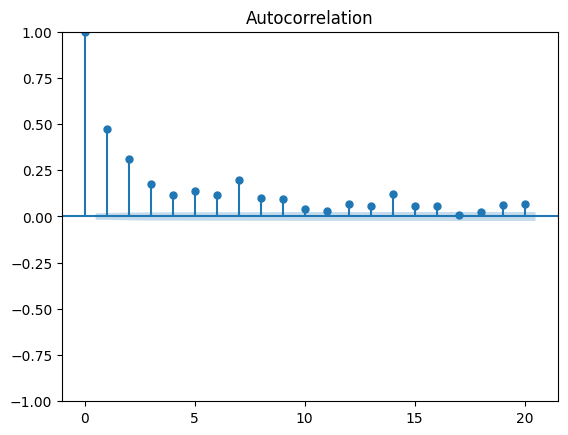

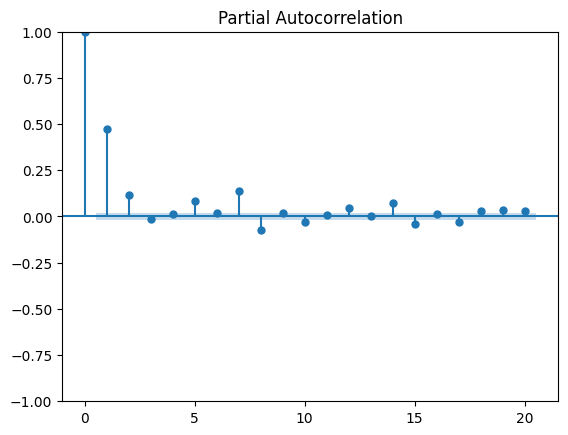

In [ ]:
# Plot ACF and PACF to determine p and q for ARIMA model
plot_acf(df['HCHO_diff'], lags=20)
plot_pacf(df['HCHO_diff'], lags=20)
plt.show()

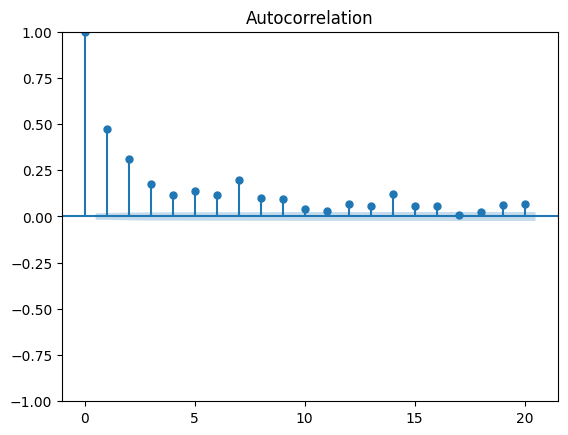

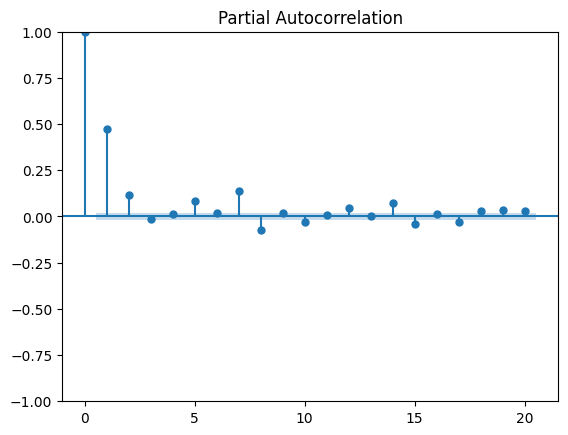

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

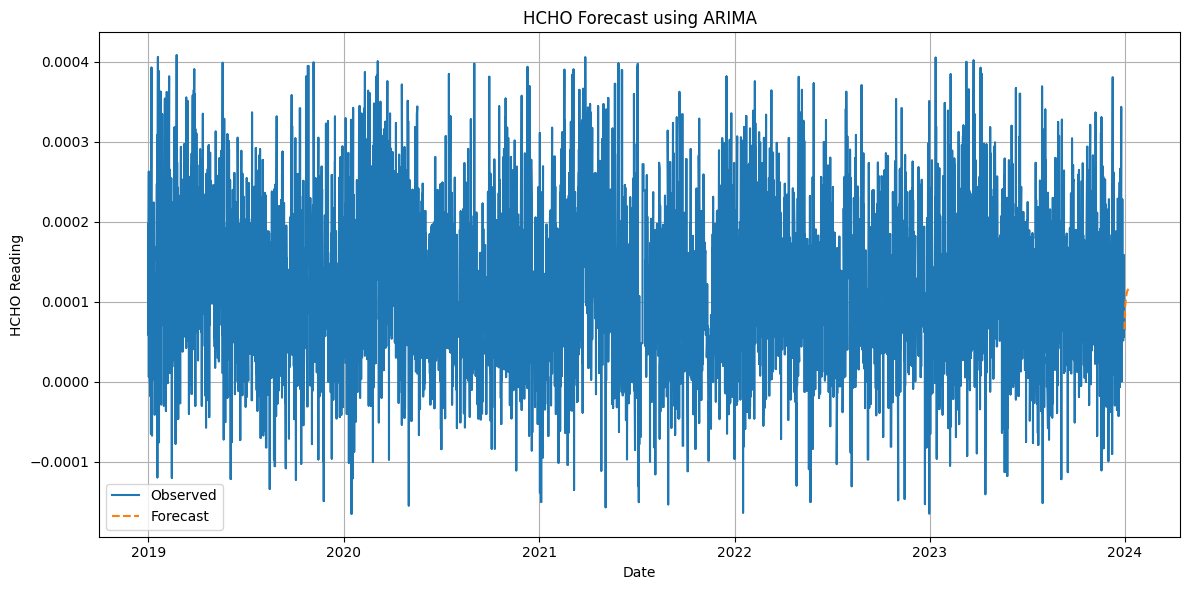

In [ ]:
# Plot ACF and PACF to determine p and q for ARIMA model
plot_acf(df['HCHO_diff'], lags=20)
plot_pacf(df['HCHO_diff'], lags=20)
plt.show()

# Train ARIMA model
model = ARIMA(df['HCHO'], order=(1,0,1))  # p=1, d=0, q=1
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months ahead

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['HCHO'], label='Observed')
plt.plot(pd.date_range(start=df.index[-1], periods=13), np.append(df['HCHO'].iloc[-1], forecast), label='Forecast', linestyle='--')
plt.title('HCHO Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
# Convert 'Current date' to datetime format and set as index
df['Current date'] = pd.to_datetime(df['Current date'])
df.set_index('Current date', inplace=True)

# Check the stationarity of the time series data
result = adfuller(df['HCHO'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# If the data is not stationary, take the first difference
if result[1] > 0.05:
    df['HCHO_diff'] = df['HCHO'] - df['HCHO'].shift(1)
    df.dropna(inplace=True)
else:
    df['HCHO_diff'] = df['HCHO']

# Plot ACF and PACF to determine p, q, P, and Q for SARIMA model
plot_acf(df['HCHO_diff'], lags=20)
plot_pacf(df['HCHO_diff'], lags=20)
plt.show()

# Train SARIMA model
model = SARIMAX(df['HCHO'], order=(1,0,1), seasonal_order=(1,0,1,12))  # p=1, d=0, q=1; P=1, D=0, Q=1, m=12
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months ahead

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['HCHO'], label='Observed')
plt.plot(pd.date_range(start=df.index[-1], periods=13), np.append(df['HCHO'].iloc[-1], forecast), label='Forecast', linestyle='--')
plt.title('HCHO Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

KeyError: 'Current date'

In [ ]:
df

,HCHO,Location,Next date,HCHO_diff
Current date,,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02,0.000197
2019-01-01,0.000197,"Deniyaya, Matara",2019-01-02,0.000197
2019-01-01,0.000176,Nuwara Eliya Proper,2019-01-02,0.000176
2019-01-01,0.000176,Kandy Proper,2019-01-02,0.000176
2019-01-01,0.000176,"Bibile, Monaragala",2019-01-02,0.000176
...,...,...,...,...
2023-12-31,0.000080,Nuwara Eliya Proper,2024-01-01,0.000080
2023-12-31,0.000080,Kandy Proper,2024-01-01,0.000080
2023-12-31,0.000065,"Bibile, Monaragala",2024-01-01,0.000065
